In [9]:
import os
import csv
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
from collections import Counter

Import generali 

In [10]:
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, res_type=None, sr=None, mono=False)
    duration = librosa.get_duration(y=y, sr=sr)
    channels = 'Mono' if y.ndim == 1 else 'Stereo'
    return {'Audio': audio_path, 'Durata (s)': duration, 'Canali': channels, 'Frequenza di campionamento (Hz)': sr}

Function that extract the audio features

In [11]:
def calculate_median(durations):
    # Ordina la lista
    sorted_durations = sorted(durations)
    n = len(sorted_durations)
    
    # Se il numero di elementi è dispari, ritorna l'elemento centrale
    if n % 2 == 1:
        median = sorted_durations[n // 2]
    else:
        # Se il numero di elementi è pari, ritorna la media dei due elementi centrali
        median = (sorted_durations[n // 2 - 1] + sorted_durations[n // 2]) / 2
    
    return median

Calculate the median

In [12]:
# Nel caso in cui volessimo dividere la ricerca tra target e non target, basta fare due for separati e passare 
# target path e non target path al posto di dataset
target_path = 'Dataset/Target'
non_target_path = 'Dataset/Non-Target'

# Lista per memorizzare i percorsi dei file audio
audio_files = []
 

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav','.mp3')):
           audio_files.append(os.path.join(root, file))
audio_features = []

for file in audio_files:

    feature1 = extract_audio_features(file)
    audio_features.append(feature1)
print(audio_features)

[{'Audio': 'Dataset\\Non-Target\\Ambient Noise\\0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\30679527-fd7a-4cad-8c7d-cb1bcc07604d.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\f9652ad2-39f5-41b4-a8e4-89171a864f03.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Antarctic Minke Whale\\Bioduck.wav', 'Dura

Stampiamo le caratteristiche degli audio 

In [13]:
file_names = [os.path.basename(file) for file in audio_files]

file_counts = Counter(file_names)
duplicates_info = {}
# Creare un dizionario per mantenere traccia del percorso del file originale
original_paths = {}

for file_path in audio_files:
    file_name = os.path.basename(file_path)
    if file_counts[file_name] > 1:
        if file_name not in duplicates_info:
            duplicates_info[file_name] = {
                "count": file_counts[file_name],
                "paths": [file_path]
            }
            # Memorizza il percorso del file originale
            original_paths[file_name] = file_path
        else:
            duplicates_info[file_name]["count"] += 1
            duplicates_info[file_name]["paths"].append(file_path)

# Stampare informazioni sui file duplicati
total_duplicate_count = sum(info["count"] for info in duplicates_info.values())
print(f"Numero totale di file audio duplicati: {total_duplicate_count/3}")

for file_name, info in duplicates_info.items():
    print(f"Nome del file duplicato: {file_name}")
    print(f"Percorsi duplicati ({info['count']-1}):")
    for path in info["paths"]:
        print(path)
    print(f"Percorso del file originale: {original_paths[file_name]}")
    print()

Numero totale di file audio duplicati: 25.0
Nome del file duplicato: 72021005.wav
Percorsi duplicati (2):
Dataset\Non-Target\Bearded Seal\72021005.wav
Dataset\Non-Target\Bowhead Whale\72021005.wav
Percorso del file originale: Dataset\Non-Target\Bearded Seal\72021005.wav

Nome del file duplicato: 7202100T.wav
Percorsi duplicati (2):
Dataset\Non-Target\Bearded Seal\7202100T.wav
Dataset\Non-Target\Bowhead Whale\7202100T.wav
Percorso del file originale: Dataset\Non-Target\Bearded Seal\7202100T.wav

Nome del file duplicato: 7202100V.wav
Percorsi duplicati (2):
Dataset\Non-Target\Bearded Seal\7202100V.wav
Dataset\Non-Target\Bowhead Whale\7202100V.wav
Percorso del file originale: Dataset\Non-Target\Bearded Seal\7202100V.wav

Nome del file duplicato: 7202100Z.wav
Percorsi duplicati (2):
Dataset\Non-Target\Bearded Seal\7202100Z.wav
Dataset\Non-Target\Bowhead Whale\7202100Z.wav
Percorso del file originale: Dataset\Non-Target\Bearded Seal\7202100Z.wav

Nome del file duplicato: 78018002.wav
Percor

Stampiamo i file uguali nel dataset

In [14]:
csv_file = 'Features.csv'
def scrivi_csv(audio_features, csv_file):
    if not audio_features:
        return  # Se la lista è vuota, non fare nulla

    # Ottieni le chiavi dal primo dizionario per usarle come intestazioni
    keys = audio_features[0].keys()

    with open(csv_file, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=keys)
        
        # Scrivi l'intestazione
        #writer.writeheader()
        
        # Scrivi le caratteristiche
        for features in audio_features:
            writer.writerow(features)

scrivi_csv(audio_features, csv_file)

Script per scrivere le caratteristiche in un file csv

   FileName         Label                       Dataset
0  70025008  Bearded Seal  Watkins Marine Mammals Sound
1  71012002  Bearded Seal  Watkins Marine Mammals Sound
2  7801800J  Bearded Seal  Watkins Marine Mammals Sound
3  7202100V  Bearded Seal  Watkins Marine Mammals Sound
4  71012003  Bearded Seal  Watkins Marine Mammals Sound
Label
Spinner Dolphin     114
Fraser_s Dolphin     91
Humpback Whale       90
Striped Dolphin      85
Sperm Whale          79
                   ... 
Perch                 1
Ringed Seal           1
Dolphin               1
Bar jack              1
Toadfish              1
Name: count, Length: 96, dtype: int64


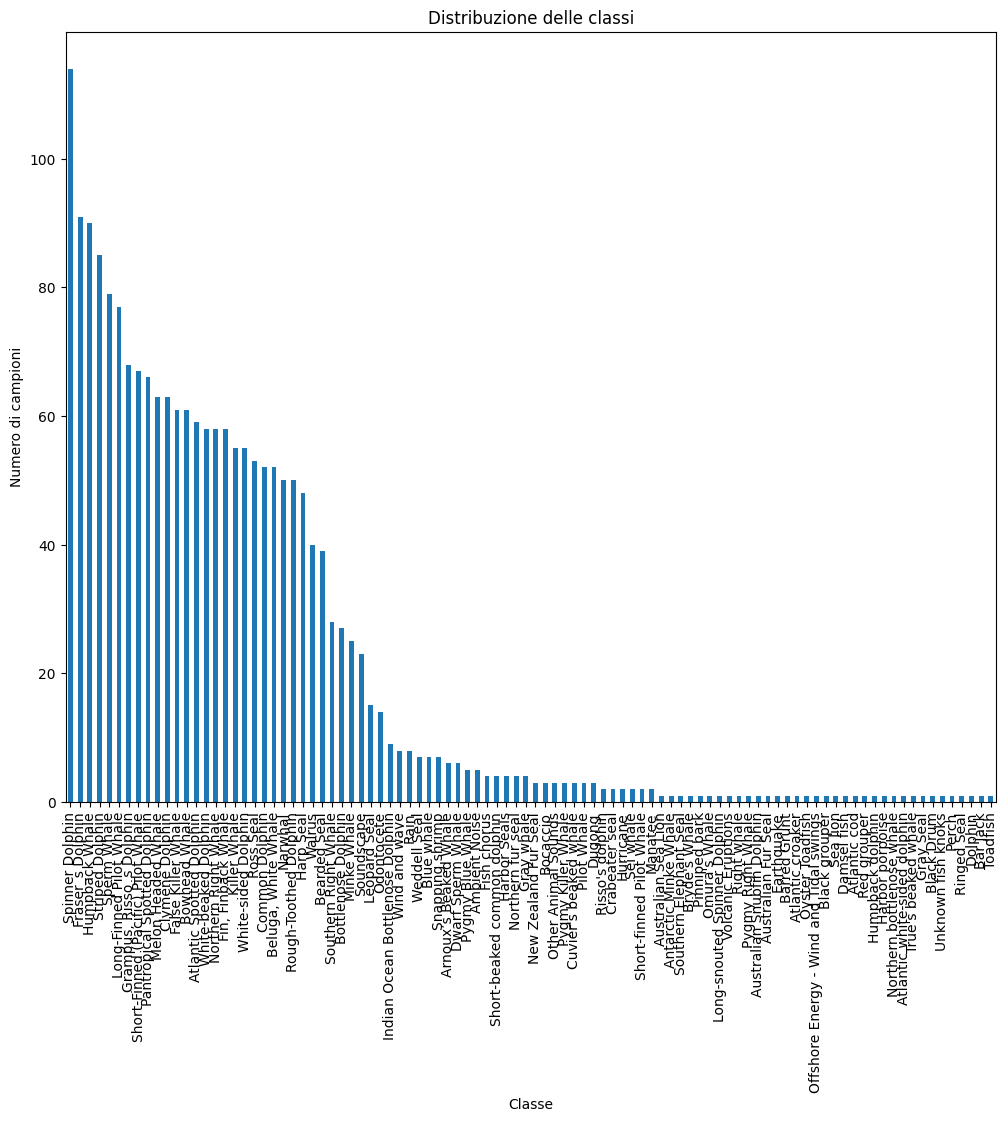

In [15]:
df = pd.read_csv("Dataset/Non-Target/metadata-NonTarget.csv")
# Visualizza le prime righe del DataFrame
print(df.head())

# Conta il numero di campioni per ogni classe
print(df['Label'].value_counts())
# Esempio di grafico a barre delle classi nel dataset
plt.figure(figsize=(12, 10))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribuzione delle classi')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.show()

Calculate the class distribution


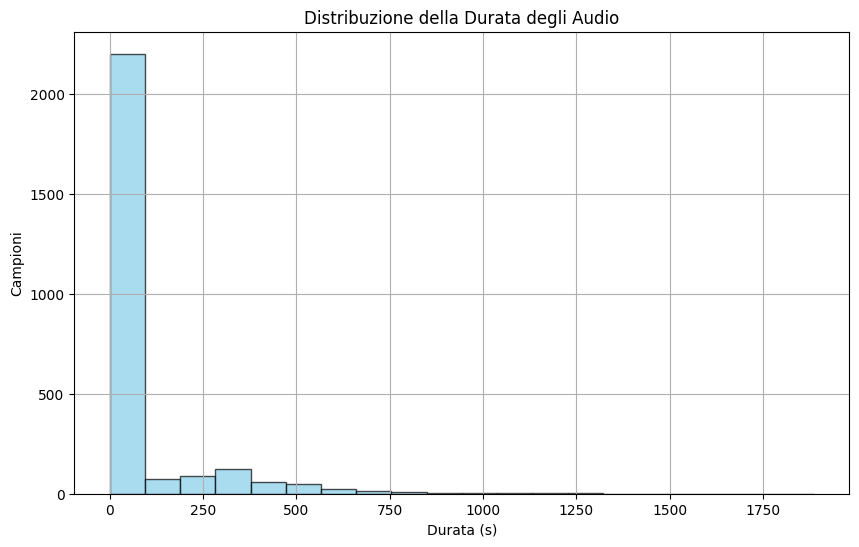

In [16]:
durations = [feat['Durata (s)'] for feat in audio_features]

# Grafico della distribuzione della durata
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Durata degli Audio')
plt.xlabel('Durata (s)')
plt.ylabel('Campioni')
plt.grid(True)
plt.show()

Audio Duration Distribution

In [17]:
durations = [feat['Durata (s)'] for feat in audio_features]

median_duration = calculate_median(durations)
print(f"La mediana delle durate degli audio è: {median_duration}")

La mediana delle durate degli audio è: 3.440625


The median is calculated

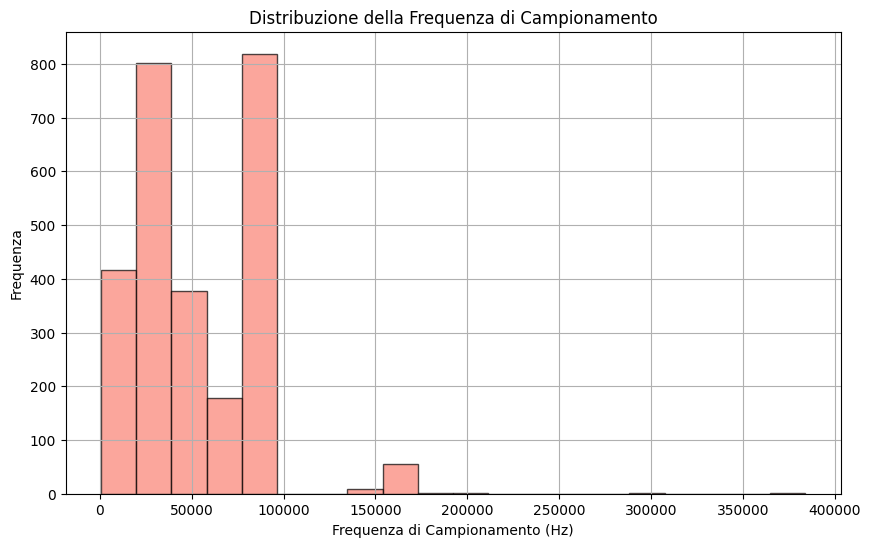

In [18]:
frequencies = [feat['Frequenza di campionamento (Hz)'] for feat in audio_features]

# Grafico della distribuzione della frequenza di campionamento
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Frequenza di Campionamento')
plt.xlabel('Frequenza di Campionamento (Hz)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

Sampling Rate Distribution

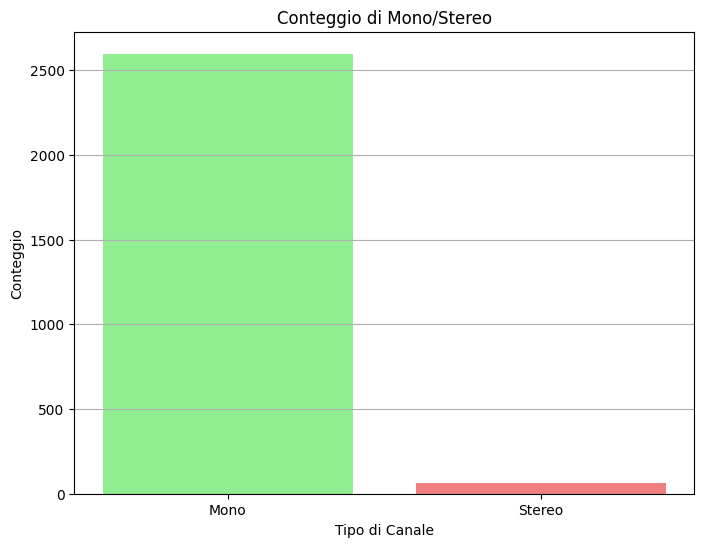

In [19]:
channels = [feat['Canali'] for feat in audio_features]

# Grafico del conteggio di mono/stereo
plt.figure(figsize=(8, 6))
plt.bar(['Mono', 'Stereo'], [channels.count('Mono'), channels.count('Stereo')], color=['lightgreen', 'lightcoral'])
plt.title('Conteggio di Mono/Stereo')
plt.xlabel('Tipo di Canale')
plt.ylabel('Conteggio')
plt.grid(axis='y')
plt.show()

Mono/Stereo counting

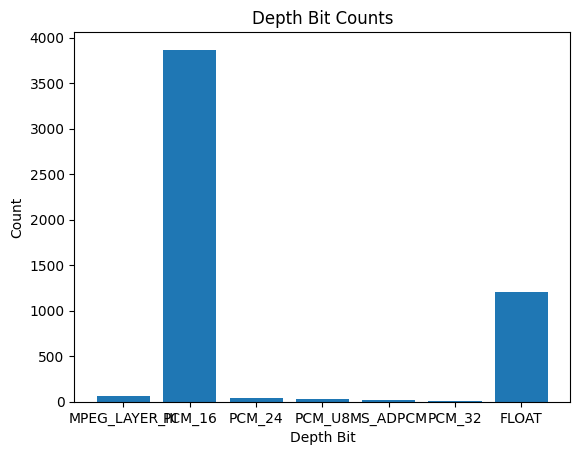

In [20]:
for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav')):
           audio_files.append(os.path.join(root, file))
# Creare un dizionario per tenere traccia del conteggio di ciascun valore
depth_bit_counts = {}

for file in audio_files:
    audio = sf.SoundFile(file)
    depth_bit = audio.subtype
    
    # Aggiungere il valore al dizionario o incrementare il conteggio se già presente
    if depth_bit in depth_bit_counts:
        depth_bit_counts[depth_bit] += 1
    else:
        depth_bit_counts[depth_bit] = 1

# Estrai i dati per il grafico
depth_bits = list(depth_bit_counts.keys())
counts = list(depth_bit_counts.values())

# Creare il grafico a barre
plt.bar(depth_bits, counts)
plt.xlabel('Depth Bit')
plt.ylabel('Count')
plt.title('Depth Bit Counts')
plt.show()

Depth Bit Counts